In [26]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [4]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290
...,...,...,...,...
9995,97112.86,0,12,25060.64248
9996,107424.63,1,16,21317.31764
9997,93856.99,0,4,20950.38812
9998,51250.57,1,7,16840.13376


In [5]:
dados_azar = dados.sort_values("vendido", ascending=True)
X_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
10,75668.42,0,2,22635.36710
7,65265.09,0,10,18666.73466
3,95276.14,0,3,43167.32682
2,89627.50,0,12,11440.79806
4221,64724.65,0,10,13194.97866


In [7]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_azar, y_azar, cv=10)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

Accuracy com dummy stratified = [0.58%, 0.58%]


In [9]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=10)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

Accuracy com dummy stratified = [0.732631766053217%, 0.782968233946783%]


## Gerando dados aleatórios de modelo de carro para simular agrupamento ao usar nosso

In [11]:
dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min())
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,17
1,40557.96,1,20,12622.05362,20
2,89627.50,0,12,11440.79806,11
3,95276.14,0,3,43167.32682,3
4,117384.68,1,4,12770.11290,6


In [12]:
def imprime_resultados(results):
    media = results["test_score"].mean()
    desvio_padrao = results["test_score"].std()
    print(f"Accuracy Médio {media}")
    print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

### GroupKFOLD para anlisar o modelo com grupos

In [15]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7577773186997147
Accuracy com dummy stratified = [0.7441430587738889%, 0.7714115786255404%]


# GroupKFold em um pipeline com StandardScaler e SVC

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([
    ("transformação", scaler), ("estimador", modelo)
])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7671040443184151
Accuracy com dummy stratified = [0.7511268819900816%, 0.7830812066467485%]


# Visualizando a árvore

In [21]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7577773186997147
Accuracy com dummy stratified = [0.7441430587738889%, 0.7714115786255404%]


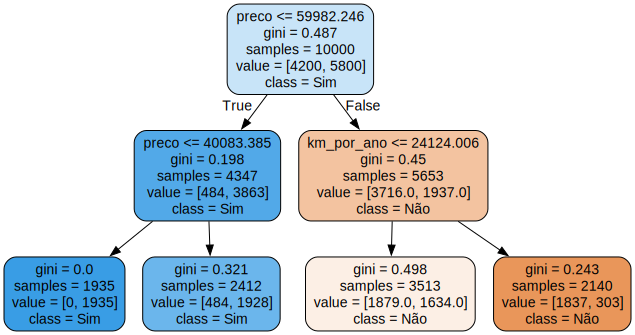

In [27]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [28]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7866746150096422
Accuracy com dummy stratified = [0.7668996359441729%, 0.8064495940751115%]


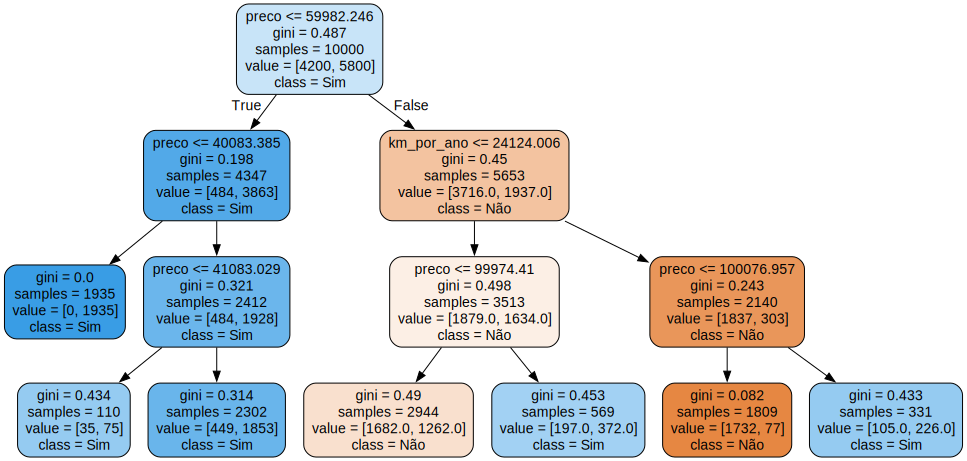

In [29]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Testando Hiperparâmetros - 1D

In [46]:
def roda_avore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    # print(f"Arvore max_depth = {max_depth}, treino = {results['train_score'].mean():.2f}, teste = {results['test_score'].mean():.2f}")

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_avore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "teste"])
resultados.head()

,max_depth,train,teste
0,1,0.757911,0.757777
1,2,0.757911,0.757777
2,3,0.787566,0.786675
3,4,0.787978,0.786484
4,5,0.789210,0.785382


### Overfitting

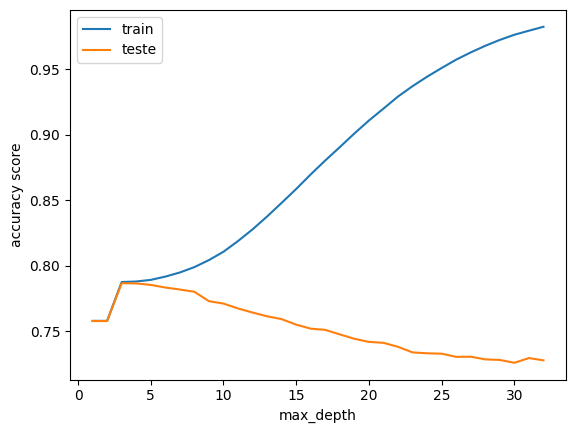

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = resultados, x="max_depth", y="train", label="train")
sns.lineplot(data = resultados, x="max_depth", y="teste", label="teste")
plt.ylabel("accuracy score")
plt.legend()

# Testando Hiperparâmetros - 2D

In [55]:
def roda_avore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    # print(f"Arvore max_depth = {max_depth}, treino = {results['train_score'].mean():.2f}, teste = {results['test_score'].mean():.2f}")

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, min_samples_leaf, train_score, test_score]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1, 11):
        for min_samples_leaf in range(1, 11):
            tabela = roda_avore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "teste"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,teste
0,1,1,0.757911,0.757777
1,1,2,0.757911,0.757777
2,1,3,0.757911,0.757777
3,1,4,0.757911,0.757777
4,1,5,0.757911,0.757777


In [57]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,train,teste
27,3,8,0.787533,0.786774
28,3,9,0.787533,0.786774
29,3,10,0.787533,0.786774
24,3,5,0.787533,0.786774
26,3,7,0.787533,0.786774


In [66]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,teste
max_depth,1.000000e+00,4.047940e-16,0.888403,0.200680
min_samples_leaf,4.047940e-16,1.000000e+00,-0.046739,-0.045025
train,8.884026e-01,-4.673861e-02,1.000000,0.597085
teste,2.006796e-01,-4.502547e-02,0.597085,1.000000


<Axes: >

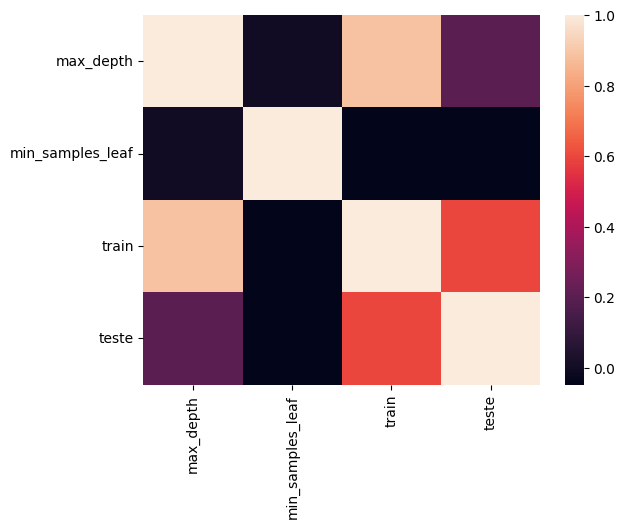

In [60]:
sns.heatmap(data=corr)

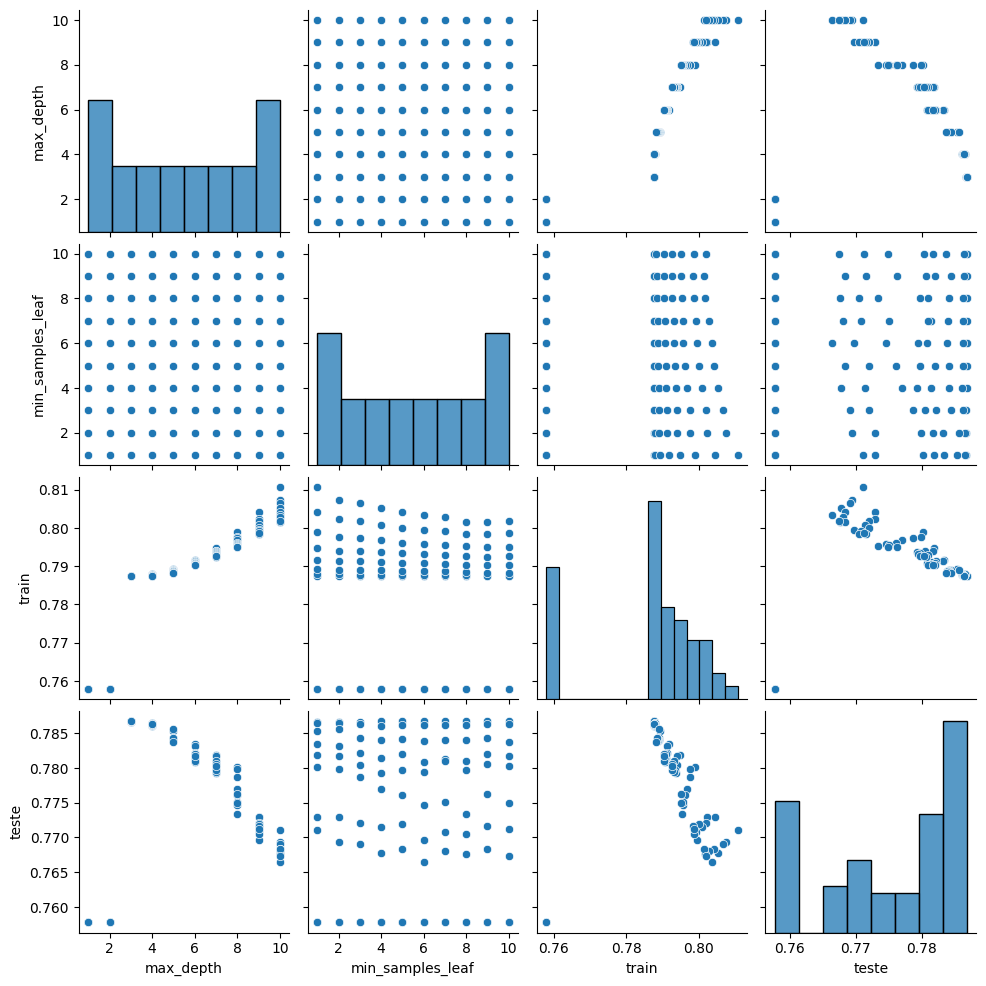

In [62]:
sns.pairplot(resultados)

<Axes: >

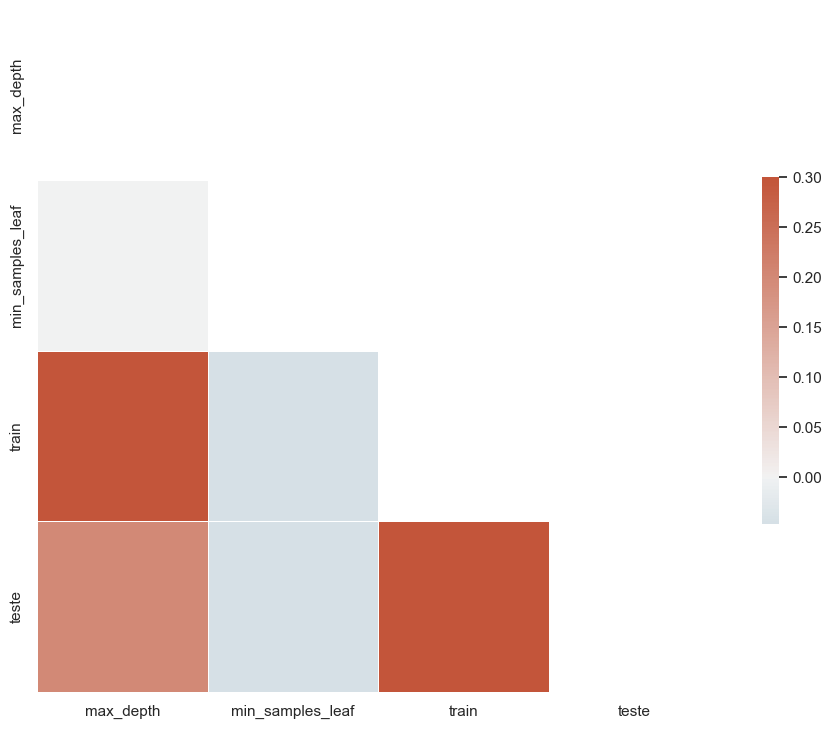

In [67]:
from string import ascii_letters

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hyperparameter Tuning - 3D

In [75]:
def roda_avore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)

    fit_time = results["fit_time"].mean()
    score_time = results["score_time"].mean()

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1, 6):
        for min_samples_leaf in range(1, 6):
            for min_samples_split in [32, 64, 128, 526]:
                tabela = roda_avore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_split", "train", "teste", "fit_time", "score_time"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,teste,fit_time,score_time
0,1,1,32,0.757911,0.757777,0.015468,0.004388
1,1,1,64,0.757911,0.757777,0.008776,0.003123
2,1,1,128,0.757911,0.757777,0.009432,0.003304
3,1,1,526,0.757911,0.757777,0.010969,0.003691
4,1,2,32,0.757911,0.757777,0.010922,0.003391


In [76]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,teste,fit_time,score_time
99,5,5,526,0.788121,0.786774,0.013921,0.001893
58,3,5,128,0.787533,0.786774,0.009971,0.001992
59,3,5,526,0.787533,0.786774,0.009920,0.001703
57,3,5,64,0.787533,0.786774,0.010080,0.002091
56,3,5,32,0.787533,0.786774,0.009878,0.001947


In [77]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train,teste,fit_time,score_time
max_depth,1.000000e+00,3.241851e-16,1.458182e-16,0.875725,0.858142,0.850746,-0.548829
min_samples_leaf,3.241851e-16,1.000000e+00,3.645454e-17,-0.002967,-0.003196,-0.189743,-0.201220
min_samples_split,1.458182e-16,3.645454e-17,1.000000e+00,-0.004318,0.008378,-0.018694,0.082448
train,8.757247e-01,-2.966598e-03,-4.318389e-03,1.000000,0.998795,0.737704,-0.473110
teste,8.581422e-01,-3.196161e-03,8.377700e-03,0.998795,1.000000,0.717375,-0.471241
fit_time,8.507460e-01,-1.897426e-01,-1.869383e-02,0.737704,0.717375,1.000000,-0.120565
score_time,-5.488291e-01,-2.012204e-01,8.244780e-02,-0.473110,-0.471241,-0.120565,1.000000


<Axes: >

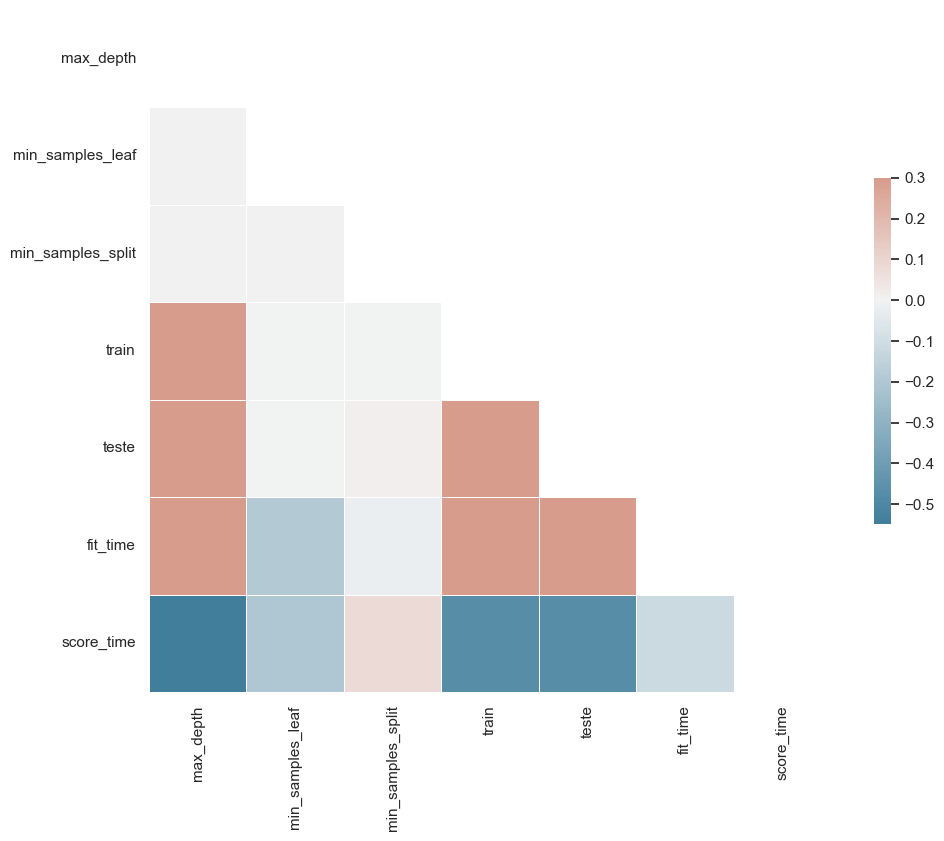

In [78]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hiperparameter Search with GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = GroupKFold(n_splits=10))
busca.fit(X_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

d:\Documents\Coding\Repositorios\MyRepositories\Alura\MachineLearning\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014025,0.002367,0.002593,0.000798,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.785642,...,0.789738,0.781188,0.784372,0.798095,0.802632,0.798379,0.770895,0.786774,0.009859,1
1,0.010481,0.001192,0.001886,0.000699,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.785642,...,0.789738,0.781188,0.784372,0.798095,0.802632,0.798379,0.770895,0.786774,0.009859,1
2,0.009791,0.001158,0.001678,0.000628,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.785642,...,0.789738,0.781188,0.784372,0.798095,0.802632,0.798379,0.770895,0.786774,0.009859,1
3,0.009389,0.000500,0.001582,0.000663,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.785642,...,0.789738,0.781188,0.784372,0.798095,0.802632,0.798379,0.770895,0.786774,0.009859,1
4,0.011179,0.001393,0.001982,0.000456,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.785642,...,0.789738,0.781188,0.784372,0.798095,0.802632,0.798379,0.770895,0.786774,0.009859,1


In [81]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67735269779902


In [85]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

# ERRADO! Tem Data Leaking

In [88]:
from sklearn.metrics import accuracy_score

predicoes = melhor.predict(X_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print(f"Accuracy para os dados {accuracy}%")

Accuracy para os dados 78.75%


# Nested Cross Validation

Accurate way to measure the generalization error.
- Unfortunately, nested cross validation doesnt work for group division of the dataset, thus another method of k-folding is necessary

In [92]:
from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=10, shuffle=True))
busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

d:\Documents\Coding\Repositorios\MyRepositories\Alura\MachineLearning\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012770,0.002556,0.002489,0.000922,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
1,0.010070,0.001045,0.001799,0.000600,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
2,0.009879,0.000946,0.001695,0.000454,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
3,0.010074,0.000938,0.001794,0.000399,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
4,0.010272,0.000639,0.001996,0.000894,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1


In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7935, 0.787 , 0.789 , 0.7825, 0.782 ])

In [106]:
def imprime_scores(scores):
    media = scores.mean() * 100
    desvio_padrao = scores.std() * 100
    print(f"Accuracy Médio {media}")
    print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao:.2f}%, {media + 2*desvio_padrao:.2f}%]")

In [107]:
imprime_scores(scores)

Accuracy Médio 78.68
Accuracy com dummy stratified = [77.83%, 79.53%]


In [109]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

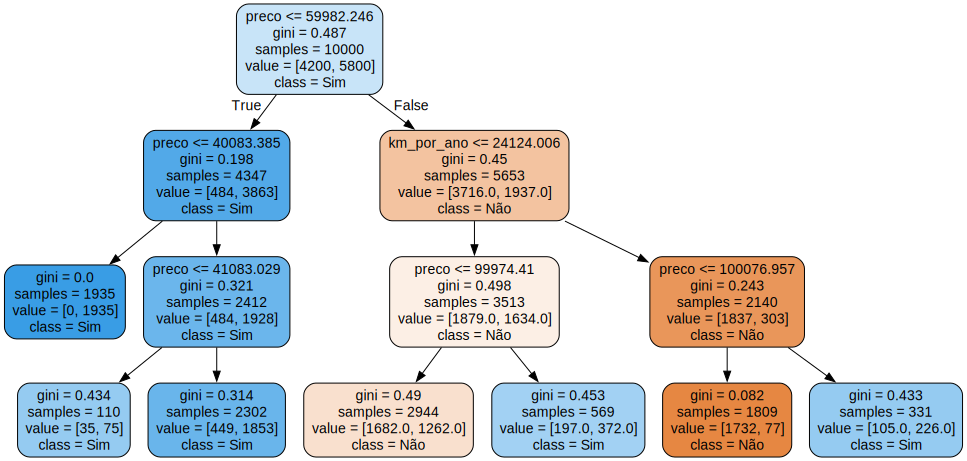

In [110]:
features = X_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph